In [38]:
#Import dos dados
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [14]:
#Leitura dos dados

data = pd.read_csv("data/lithology.csv",';')

In [15]:
pd.set_option('display.float_format', str)
data.head()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,494.528,437641.96875,6470972.5,-469.50183110000006,19.480834961,-999.0,1.6114097834,1.7986813784,1.884185791,80.20085144,...,24.73569095158781,0.31484686817707136,0.15017183162707218,-0.0,-0.0,-0.0,0.0,0.0,6,68
1,494.68,437641.96875,6470972.5,-469.6538086,19.468799591,-999.0,1.6180702448,1.7956413031,1.8897935152,79.262886047,...,24.492376100271635,0.3185281394725607,0.1482686127827626,0.5277099599999815,-0.005607724200000108,0.9379653929999988,0.1519999999999868,-0.24331485131617114,6,68
2,494.832,437641.96875,6470972.5,-469.8057861,19.468799591,-999.0,1.6264585257,1.8007333279,1.8965227604,74.821998596,...,24.202298635769967,0.3229456493770365,0.13925763994167714,0.4298553499999969,-0.006729245199999846,4.440887450999995,0.1519999999999868,-0.29007746450166394,6,68
3,494.984,437641.96875,6470972.5,-469.9577942,19.459281921,-999.0,1.6215940714,1.8015166521,1.891912818,72.878921509,...,24.4007967435326,0.3199193863110002,0.1353149561758119,0.02418518000001768,0.004609942399999678,1.9430770870000058,0.15200000000004366,0.19849810776263155,6,68
4,495.136,437641.96875,6470972.5,-470.1097717,19.453100204000002,-999.0,1.6026790141999998,1.7952990532,1.8800340891,71.729141235,...,24.91676523082089,0.31212142368536505,0.13298194527730406,0.021087649999998348,0.01187872890000019,1.149780273999994,0.15199999999992994,0.5159684872882906,6,68


In [16]:
data.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded'],
      dtype='object')

In [20]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000.0    720803
30000.0    168937
65030.0    150455
70000.0     56320
80000.0     33329
99000.0     15245
70032.0     10513
88000.0      8213
90000.0      3820
74000.0      1688
86000.0      1085
93000.0       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

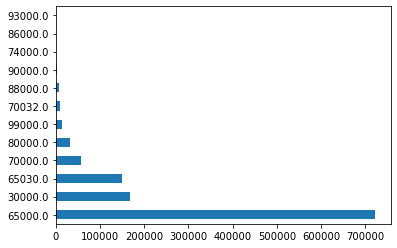

In [21]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts().plot(kind = 'barh')

In [22]:
data.corr()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
DEPTH_MD,1.0,-0.0819037843543615,0.24974516491576274,-0.9878898931591696,0.24228656338536927,0.07296065036159242,0.05586354803696833,0.0628617203278668,0.26739935189164377,0.0982817786527117,...,0.2528012343190198,0.2671596692096795,0.04482983745861071,0.2159838368420734,0.26686816321778384,0.00043246587827933455,0.0024448354449094316,0.2668683902088381,0.056806771476690325,-0.2939979485870154
X_LOC,-0.0819037843543615,1.0,0.41687468666746946,0.08587702043883577,-0.24981936528219134,-0.16460831039987422,-0.04430307326710763,0.05477955767681561,0.09853280237323603,0.2311902145404378,...,0.09684980741467185,0.09848476648558123,0.167772977761011,-0.07124828963117748,0.09843513927705184,-0.0002873500444498307,0.0009737504954764436,0.09843402140853871,0.09492288758927875,-0.22515142676223737
Y_LOC,0.24974516491576274,0.41687468666746946,1.0,-0.25962317672858753,-0.14818102761524918,-0.17565026276121934,0.10994130109115977,0.009231210387407733,0.10605590416777923,0.20645338995155152,...,0.10234648041388915,0.10596477026027432,0.13175986690019229,0.04783152975035586,0.1058514761790346,-0.00018377625449477613,0.002193993329189411,0.10585100559979665,0.02458497044380584,-0.16386011903930378
Z_LOC,-0.9878898931591696,0.08587702043883577,-0.25962317672858753,1.0,-0.23439065254550676,-0.08860963160369764,-0.08783127668202087,-0.11100962309900536,-0.2774825875386866,-0.1015294315872954,...,-0.26297056442632444,-0.2772469553604718,-0.04370307322649287,-0.2083892426283952,-0.2769511501576265,-0.0004144602807345328,-0.0025092405617043803,-0.2769513006087813,-0.044176325108347334,0.29177146021238404
CALI,0.24228656338536927,-0.24981936528219134,-0.14818102761524918,-0.23439065254550676,1.0,0.23085889379498087,0.20018709661961548,0.059856055943407746,0.29062309233530914,-0.13147904369031696,...,0.2881042056973987,0.29059178845199957,-0.13320376621136276,0.3943635581436789,0.29046688299009865,0.000167157576187923,0.00033843543195942135,0.29046617868234137,0.05522716888534808,0.0174842766625057
RSHA,0.07296065036159242,-0.16460831039987422,-0.17565026276121934,-0.08860963160369764,0.23085889379498087,1.0,0.03844717173451164,0.04112158155378359,0.11386041808186012,-0.043931877476474104,...,0.11253708220824228,0.11391521752275138,-0.06352059552008768,0.08876003533306699,0.11381845142706905,-0.00039835798045296394,-0.0016634895071933875,0.11381955840614595,-0.011004380639581202,0.001706151252450675
RMED,0.05586354803696833,-0.04430307326710763,0.10994130109115977,-0.08783127668202087,0.20018709661961548,0.03844717173451164,1.0,0.0937799286613289,0.204209794362476,0.11714961148693707,...,0.2047815501149625,0.20421855011359874,0.08740552396817348,0.3507218766846578,0.20432837128854142,0.0012243742978346817,0.00017514012139802754,0.2043234415705519,-0.031007049948728983,-0.02234680058173094
RDEP,0.0628617203278668,0.05477955767681561,0.009231210387407733,-0.11100962309900536,0.059856055943407746,0.04112158155378359,0.0937799286613289,1.0,0.11398775712122694,0.009550229408864226,...,0.114446500795589,0.11399444392521939,0.003944188475401631,0.09066510010018941,0.11400300732222209,0.0006615446127881132,0.0003252315922464783,0.11400384981790701,0.045048147200426894,-0.00623900437755596
RHOB,0.26739935189164377,0.09853280237323603,0.10605590416777923,-0.2774825875386866,0.29062309233530914,0.11386041808186012,0.204209794362476,0.11398775712122694,1.0,-0.00258221919288915,...,0.9997273941497861,0.9999999008571071,-0.06267443912272554,0.46241796166920235,0.9995829120395333,0.00040763777724210393,0.000908408875253101,0.9995793328087291,0.02236078900636516,-0.12774900438153763
GR,0.0982817786527117,0.2311902145404378,0.20645338995155152,-0.1015294315872954,-0.13147904369031696,-0.043931877476474104,0.11714961148693707,0.009550229408864226,-0.00258221919288915,1.0,.

In [23]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC,FORCE_2020_LITHOFACIES_LITHOLOGY,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
DEPTH_MD,1.000000,-0.081904,0.249745,-0.987890,0.242287,0.072961,0.055864,0.062862,0.267399,0.098282,0.414375,0.201044,0.086242,-0.212204,-0.618097,-0.031847,0.253296,0.249273,-0.182790,0.146459,-0.007422,0.252801,0.267160,0.044830,0.215984,0.266868,0.000432,0.002445,0.266868,0.056807,-0.293998
X_LOC,-0.081904,1.000000,0.416875,0.085877,-0.249819,-0.164608,-0.044303,0.054780,0.098533,0.231190,0.089433,-0.035485,-0.076769,-0.121053,-0.092630,-0.078123,-0.215753,0.055254,-0.333802,0.223622,-0.019755,0.096850,0.098485,0.167773,-0.071248,0.098435,-0.000287,0.000974,0.098434,0.094923,-0.225151
Y_LOC,0.249745,0.416875,1.000000,-0.259623,-0.148181,-0.175650,0.109941,0.009231,0.106056,0.206453,0.068874,0.071257,0.030885,-0.076501,-0.167017,-0.274776,-0.143624,0.090255,-0.738548,0.059190,-0.034079,0.102346,0.105965,0.131760,0.047832,0.105851,-0.000184,0.002194,0.105851,0.024585,-0.163860
Z_LOC,-0.987890,0.085877,-0.259623,1.000000,-0.234391,-0.088610,-0.087831,-0.111010,-0.277483,-0.101529,-0.411152,-0.197759,-0.081243,0.174611,0.615375,0.038685,-0.245064,-0.256565,0.193531,-0.150293,0.019270,-0.262971,-0.277247,-0.043703,-0.208389,-0.276951,-0.000414,-0.002509,-0.276951,-0.044176,0.291771
CALI,0.242287,-0.249819,-0.148181,-0.234391,1.000000,0.230859,0.200187,0.059856,0.290623,-0.131479,0.159466,0.253697,0.336849,0.117929,-0.093683,0.061482,0.911076,0.281891,0.172453,0.095982,-0.038173,0.288104,0.290592,-0.133204,0.394364,0.290467,0.000167,0.000338,0.290466,0.055227,0.017484
RSHA,0.072961,-0.164608,-0.175650,-0.088610,0.230859,1.000000,0.038447,0.041122,0.113860,-0.043932,0.108301,-0.048833,0.068859,0.262062,-0.077242,-0.000514,0.211634,0.083668,0.202040,0.166244,-0.041135,0.112537,0.113915,-0.063521,0.088760,0.113818,-0.000398,-0.001663,0.113820,-0.011004,0.001706
RMED,0.055864,-0.044303,0.109941,-0.087831,0.200187,0.038447,1.000000,0.093780,0.204210,0.117150,0.087206,0.196880,0.354425,0.248956,-0.084409,-0.014198,0.178310,0.172003,-0.063313,0.075098,-0.083413,0.204782,0.204219,0.087406,0.350722,0.204328,0.001224,0.000175,0.204323,-0.031007,-0.022347
RDEP,0.062862,0.054780,0.009231,-0.111010,0.059856,0.041122,0.093780,1.000000,0.113988,0.009550,0.086625,0.014515,0.076234,0.023633,-0.049338,0.004839,0.055512,0.106038,0.003755,0.022012,0.009211,0.114447,0.113994,0.003944,0.090665,0.114003,0.000662,0.000325,0.114004,0.045048,-0.006239
RHOB,0.267399,0.098533,0.106056,-0.277483,0.290623,0.113860,0.204210,0.113988,1.000000,-0.002582,0.474023,0.458521,0.424886,0.074638,-0.336723,-0.058474,0.291568,0.882447,-0.062072,0.084565,-0.023634,0.999727,1.000000,-0.062674,0.462418,0.999583,0.000408,0.000908,0.999579,0.022361,-0.127749
GR,0.098282,0.231190,0.206453,-0.101529,-0.131479,-0.043932,0.117150,0.009550,-0.002582,1.000000,0.169099,0.049547,-0.077324,-0.161919,-0.182325,0.034934,-0.093328,-0.026357,-0.119144,0.153378,0.163939,-0.006083,-0.002662,0.583831,-0.074397,-0.002677,-0.051292,-0.000304,-0.002682,0.062451,-0.172180


In [24]:
#Tentativa de balancear os dados de entrada para treino

balanced = data

In [25]:
#def sampling_k_elements(group, k=10000):
#    if len(group) < k:
#        return group
#    return group.sample(k)
#
#balanced = data.groupby('FORCE_2020_LITHOFACIES_LITHOLOGY').apply(sampling_k_elements).reset_index(drop=True)

In [26]:
#classes

classes = [30000, 65030, 65000, 80000, 74000, 70000, 70032, 88000, 86000, 99000, 90000, 93000]

# Fazendo o mapeamento das classes para indexs e vice-versa
class_to_idx_map = {clazz: index for index, clazz in enumerate(classes)}
idx_to_class_map = {value: key for key, value in class_to_idx_map.items()}

# fazendo a substituição
y = balanced['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: class_to_idx_map[x])
y.value_counts()

2     720803
0     168937
1     150455
5      56320
3      33329
9      15245
6      10513
7       8213
10      3820
4       1688
8       1085
11       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [27]:
# dados de entrada
X = balanced.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1)
X

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,494.528,437641.96875,6470972.5,-469.50183110000006,19.480834961,-999.0,1.6114097834,1.7986813784,1.884185791,80.20085144,...,24.73569095158781,0.31484686817707136,0.15017183162707218,-0.0,-0.0,-0.0,0.0,0.0,6,68
1,494.68,437641.96875,6470972.5,-469.6538086,19.468799591,-999.0,1.6180702448,1.7956413031,1.8897935152,79.262886047,...,24.492376100271635,0.3185281394725607,0.1482686127827626,0.5277099599999815,-0.005607724200000108,0.9379653929999988,0.1519999999999868,-0.24331485131617114,6,68
2,494.832,437641.96875,6470972.5,-469.8057861,19.468799591,-999.0,1.6264585257,1.8007333279,1.8965227604,74.821998596,...,24.202298635769967,0.3229456493770365,0.13925763994167714,0.4298553499999969,-0.006729245199999846,4.440887450999995,0.1519999999999868,-0.29007746450166394,6,68
3,494.984,437641.96875,6470972.5,-469.9577942,19.459281921,-999.0,1.6215940714,1.8015166521,1.891912818,72.878921509,...,24.4007967435326,0.3199193863110002,0.1353149561758119,0.02418518000001768,0.004609942399999678,1.9430770870000058,0.15200000000004366,0.19849810776263155,6,68
4,495.136,437641.96875,6470972.5,-470.1097717,19.453100204000002,-999.0,1.6026790141999998,1.7952990532,1.8800340891,71.729141235,...,24.91676523082089,0.31212142368536505,0.13298194527730406,0.021087649999998348,0.01187872890000019,1.149780273999994,0.15199999999992994,0.5159684872882906,6,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,444920.375,6421578.0,-999.0,8.423170089700001,-999.0,-999.0,-999.0,2.5279836655000003,77.654899597,...,3.85371450882284,0.9069279778241612,0.18853949664515748,5.7096441164653,-0.05008125310000011,-15.087707518999991,0.1519999999995889,-1.2351985575114384,11,7
1170507,3169.4644,444920.375,6421578.0,-999.0,8.3792438507,-999.0,-999.0,-999.0,2.537612915,75.363937378,...,3.6218080463958415,0.9244263150731642,0.1813041188845056,1.0341144337811414,-0.00962924949999966,2.2909622189999936,0.15200000000004366,-0.2319064624269984,11,7
1170508,3169.6164,444920.375,6421578.0,-999.0,8.3502483368,-999.0,-999.0,-999.0,2.4918599129,66.45284271199999,...,4.7396763623393445,0.8412836505383874,0.15316086290467387,-5.094578790108656,0.045753002100000106,8.911094666000013,0.15200000000004366,1.117868315943504,11,7
1170509,3169.7684,444920.375,6421578.0,-999.0,8.3137788773,-999.0,-999.0,-999.0,2.4475388527,55.784816742,...,5.862410616982359,0.7607431204988468,0.11946881979141513,-5.4017670123343615,0.044321060199999714,10.668025969999997,0.15200000000004366,1.1227342546430137,11,7


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 30 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   DEPTH_MD            1170511 non-null  float64
 1   X_LOC               1170511 non-null  float64
 2   Y_LOC               1170511 non-null  float64
 3   Z_LOC               1170511 non-null  float64
 4   CALI                1170511 non-null  float64
 5   RSHA                1170511 non-null  float64
 6   RMED                1170511 non-null  float64
 7   RDEP                1170511 non-null  float64
 8   RHOB                1170511 non-null  float64
 9   GR                  1170511 non-null  float64
 10  NPHI                1170511 non-null  float64
 11  PEF                 1170511 non-null  float64
 12  DTC                 1170511 non-null  float64
 13  SP                  1170511 non-null  float64
 14  BS                  1170511 non-null  float64
 15  ROP            

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42, stratify=y)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Tentativa de adicionar mais uma camada na rede neural

In [39]:
"""
#REGRESSÃO LOGÍSTICA MULTICLASS (SOFTMAX REGRESSION)
"""

# RECEITA DE TREINAMENTO
# 1 - DESIGN DO MODELO (INPUT, OUTPUT, FORWARD PASS)
# 2 - DEFINIÇAO DA FUNÇÃO DE CUSTO E OTIMIZADOR
# 3 - LOOP DE TREINAMENTO:
#     - FORWARD PASS: CALCULAR A PREDIÇÃO E O CUSTO
#     - BACKWARPASS: CALCULAR OS GRADIENTES
#     - ATUALIZAR OS PESOS

# CLASS DE REGRESSÃO LOGÍSTICA

class ModeloInicial(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        input_size = 30
        hidden_neurons = 30
        #hidden_neurons2 = 20
        output_size = 12
        
        self.layer1 = nn.Linear(input_size, hidden_neurons)         
        self.layer2 = nn.Linear(hidden_neurons, hidden_neurons)
        self.saida = nn.Linear(hidden_neurons, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.saida(x)
        return x

# DEFINICIÇÃO DE MODELO
model = ModeloInicial()
model

ModeloInicial(
  (layer1): Linear(in_features=30, out_features=30, bias=True)
  (layer2): Linear(in_features=30, out_features=30, bias=True)
  (saida): Linear(in_features=30, out_features=12, bias=True)
)

In [ ]:
# DEFINIÇÃO DA FUNÇAO DE CUSTO E OTIMIZADOR
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()

# optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

training_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(dataset=training_set,batch_size=128)

n_epochs = 100 # or whatever
contador_custo = []

for epoch in range(n_epochs):

    for local_batch, local_labels in trainloader:
        
        y_hat = model(local_batch)
        loss = criterion(y_hat,local_labels)

        contador_custo.append(loss)
        print(f'Epoch: {epoch} Loss: {loss}')

        #backward pass (calcular gradientes)
        loss.backward()

        #update (atualizar os pesos)
        optimizer.step()

        #limpar o otimizador
        optimizer.zero_grad()
        
# PLOTANDO O GRÁFICO DA FUNÇÃO DE CUSTO
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(contador_custo, 'b')
plt.show()

In [ ]:
# Verificar valores de underfiting e overfiting

In [45]:

"""#Fazer a predição teste"""
predicoes = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        predicoes.append(y_hat.argmax().item())
    
df = pd.DataFrame({'Y': y_test, 'YHat': predicoes})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

print(len(df))
print(df['Correct'].sum())
print(df['Correct'].sum() / len(df))

234103
144161
0.6158015916071131


In [46]:
#234103
#143768
#0.6141228433638185

In [47]:
"""#Fazer a predição treinamento"""
predicoes = []
with torch.no_grad():
    for val in X_train:
        y_hat = model.forward(val)
        predicoes.append(y_hat.argmax().item())
    
df = pd.DataFrame({'Y': y_train, 'YHat': predicoes})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df['Correct'].sum() / len(df)

print(len(df))
print(df['Correct'].sum())
print(df['Correct'].sum() / len(df))

936408
576642
0.6158020862700874


In [ ]:
# Tentou-se balancear os dados e modificar a estrutura da rede neural sem sucesso